# Data Project - GDP Per Capita & Press Freedom Rank

Data Project

GDP Data taken from  [Our World in Data](https://ourworldindata.org/grapher/gdp-per-capita-worldbank?year=2016)

In [1034]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gp
from pandas import DataFrame
import os
import fiona
from matplotlib.colors import rgb2hex


In [1035]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (17, 8)

In [1036]:
if os.path.isfile("gdp-per-capita-worldbank.csv"):
    filepath = "gdp-per-capita-worldbank.csv"
    print("loaded gdp dataset")
    filepath2 = "free press.csv"
    print("loaded fp dataset")
else:
    None
    print("Not loaded")

gdp_data = pd.read_csv(filepath)
fp_data = pd.read_csv(filepath2)
print("done")

loaded gdp dataset
loaded fp dataset
done


In [1037]:
#Grabs the (x) entry of the csv file
# gdp_data.columns <-- does same thing without data
gdp_data.head()

Entity Code  Year  \
0  Afghanistan  AFG  2002   
1  Afghanistan  AFG  2003   
2  Afghanistan  AFG  2004   
3  Afghanistan  AFG  2005   
4  Afghanistan  AFG  2006   

   GDP per capita (int.-$) (constant 2011 international $)  
0                                        1063.635574        
1                                        1099.194507        
2                                        1062.249360        
3                                        1136.123214        
4                                        1161.124889

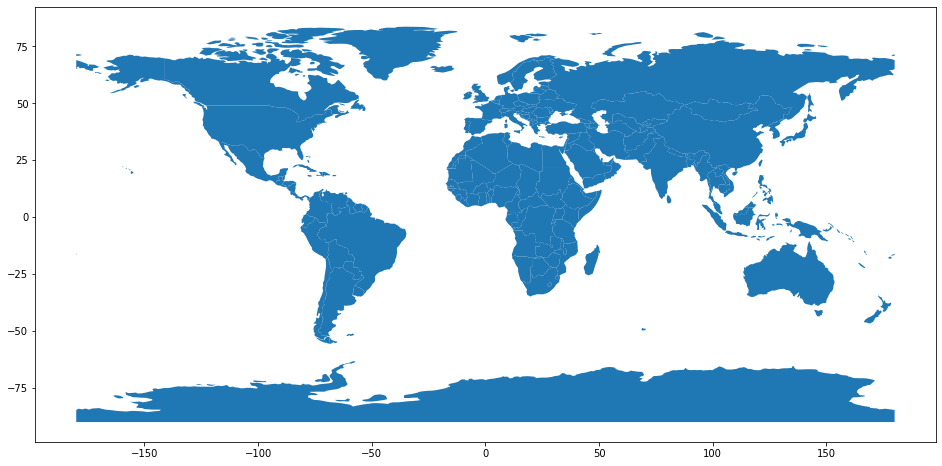

In [1038]:
#Displays empty map
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
world.plot()

In [1039]:
#Restructing Dataset
world_condensed = world[['pop_est', 'continent', 'name', 'geometry']]
world_condensed.head(3)

pop_est continent       name  \
0    920938   Oceania       Fiji   
1  53950935    Africa   Tanzania   
2    603253    Africa  W. Sahara   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...

In [1040]:
#DEFINING DATASET - Removed 'Code' from set
gdp_data = gdp_data[['Entity', 'Year', 'GDP per capita (int.-$) (constant 2011 international $)']]

In [1041]:
#RENAME AND RESTRUCTURING DATASET
data_for_map = gdp_data.rename(index=str, columns={
    "Entity": "Country",
    "GDP per capita (int.-$) (constant 2011 international $)": "GDP",
    "Year": "Year",
})

data_for_map.head()

Country  Year          GDP
0  Afghanistan  2002  1063.635574
1  Afghanistan  2003  1099.194507
2  Afghanistan  2004  1062.249360
3  Afghanistan  2005  1136.123214
4  Afghanistan  2006  1161.124889

In [1042]:
world_condensed.head()

pop_est      continent                      name  \
0     920938        Oceania                      Fiji   
1   53950935         Africa                  Tanzania   
2     603253         Africa                 W. Sahara   
3   35623680  North America                    Canada   
4  326625791  North America  United States of America   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [1043]:
#Joining geopandas with dataset
#merging name from world_condensed & country from data for map 
merged = world_condensed.set_index('name').join(data_for_map.set_index('Country'))
merged.columns


Index(['pop_est', 'continent', 'geometry', 'Year', 'GDP'], dtype='object')

In [1044]:
#YEAR SPECIFIC
df_1990 = merged[merged['Year'] == 1990]
df_2011 = merged[merged['Year'] == 2011]
df_2017 = merged[merged['Year'] == 2017]

In [1045]:

df_1990.head()

pop_est      continent  \
Albania     3047987         Europe   
Algeria    40969443         Africa   
Angola     29310273         Africa   
Argentina  44293293  South America   
Armenia     3045191           Asia   

                                                    geometry    Year  \
Albania    POLYGON ((21.02004 40.84273, 20.99999 40.58000...  1990.0   
Algeria    POLYGON ((-8.68440 27.39574, -8.66512 27.58948...  1990.0   
Angola     MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...  1990.0   
Argentina  MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...  1990.0   
Armenia    POLYGON ((46.50572 38.77061, 46.14362 38.74120...  1990.0   

                    GDP  
Albania     4722.838166  
Algeria    10236.840660  
Angola      3430.798427  
Argentina  10815.715120  
Armenia     3742.437371

In [1046]:
countries_1990 = set(list(df_1990.index))
countries_world = set(list(world_condensed.name))
countries_1990.symmetric_difference(countries_world)
# df_1990.replace(list(countries_1990.symmetric_difference(countries_world)), np.nan)

{'Afghanistan',
 'Antarctica',
 'Bosnia and Herz.',
 'Cambodia',
 'Croatia',
 'Cuba',
 'Czechia',
 "Côte d'Ivoire",
 'Djibouti',
 'Dominican Rep.',
 'Eq. Guinea',
 'Eritrea',
 'Estonia',
 'Falkland Is.',
 'Fr. S. Antarctic Lands',
 'Greenland',
 'Haiti',
 'Hungary',
 'Iceland',
 'Kosovo',
 'Kuwait',
 'Latvia',
 'Libya',
 'Lithuania',
 'Moldova',
 'Montenegro',
 'N. Cyprus',
 'New Caledonia',
 'North Korea',
 'Palestine',
 'Qatar',
 'S. Sudan',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'Solomon Is.',
 'Somalia',
 'Somaliland',
 'Syria',
 'Taiwan',
 'Timor-Leste',
 'W. Sahara',
 'eSwatini'}

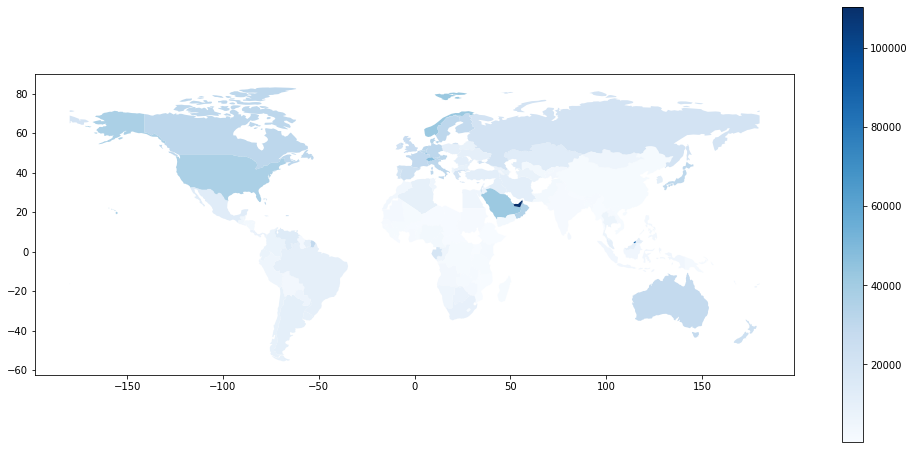

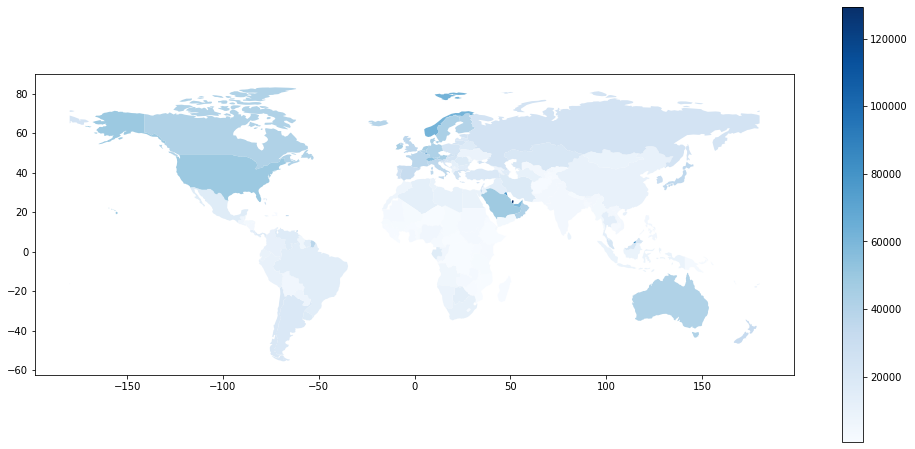

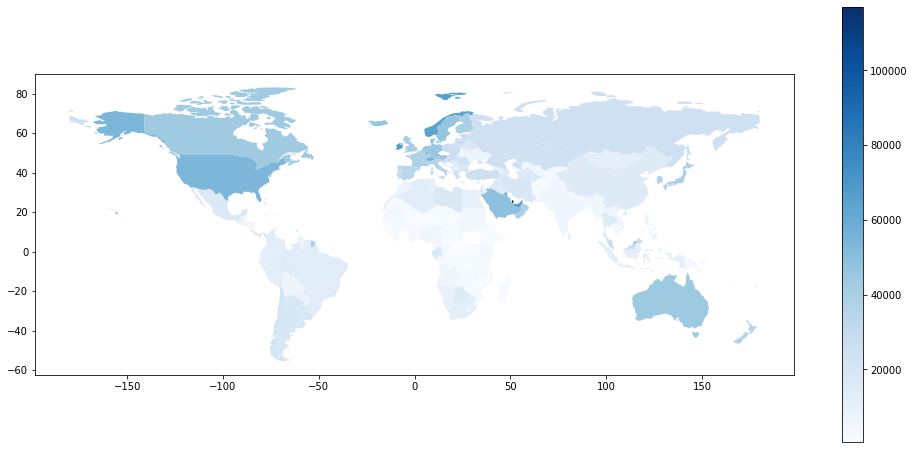

In [1047]:
# world2 = world[(world.pop_est>0) & (world.name!="Antarctica")]

# world2['gdp_per_cap']

# world.plot('gdp_per_cap')
df_1990.plot(column='GDP', legend=True, cmap='Blues')
df_2011.plot(column='GDP', legend=True, cmap='Blues')
df_2017.plot(column='GDP', legend=True, cmap='Blues')

In [1048]:
#Searching Individual Countries
search_data = data_for_map[data_for_map['Country'].str.match('Australia')]
search_data2 = data_for_map[data_for_map['Country'].str.match('Philippines')]
#Searching Superpower Countries
search_data3 = data_for_map[data_for_map['Country'].str.match('United States of America')]
search_data4 = data_for_map[data_for_map['Country'].str.match('China')]
search_data5 = data_for_map[data_for_map['Country'].str.match('Russia')]

In [1049]:
search_data5.head(5)

Country  Year          GDP
4830  Russia  1990  20639.00054
4831  Russia  1991  19553.58560
4832  Russia  1992  16704.93383
4833  Russia  1993  15274.22059
4834  Russia  1994  13370.85335

In [1050]:
merged_super = search_data3.append(search_data4)
merged_super = merged_super.append(search_data5)
merged_super.head()

Country  Year          GDP
6103  United States of America  1990  37062.13026
6104  United States of America  1991  36543.08492
6105  United States of America  1992  37321.12904
6106  United States of America  1993  37843.57328
6107  United States of America  1994  38891.69820

In [1051]:
merged_super_1990 = merged_super[merged_super['Year'] == 1990]
merged_super_2011 = merged_super[merged_super['Year'] == 2011]
merged_super_2017 = merged_super[merged_super['Year'] == 2017]

merged_super_1990.head()

Country  Year           GDP
6103  United States of America  1990  37062.130260
1043                     China  1990   1526.408699
4830                    Russia  1990  20639.000540

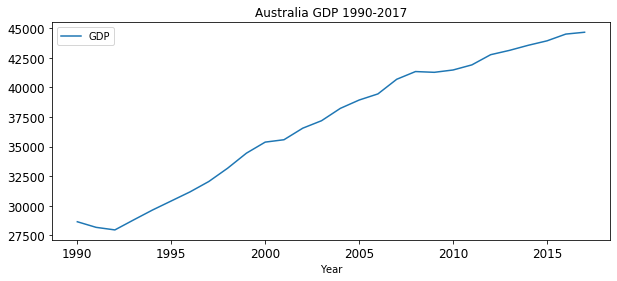

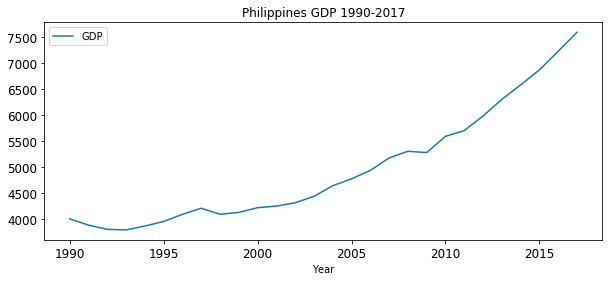

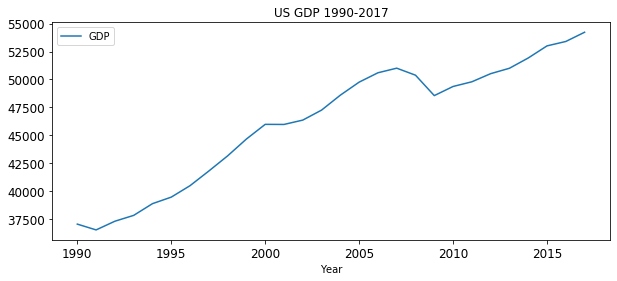

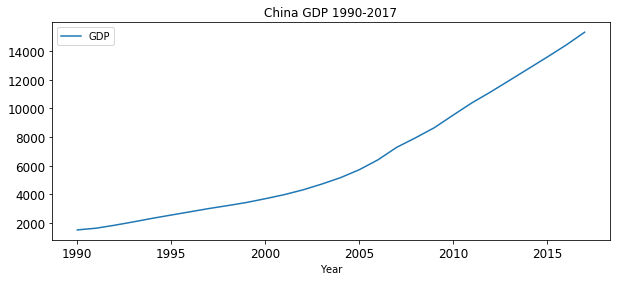

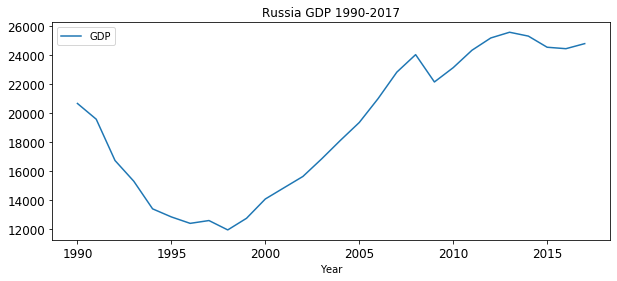

In [1070]:
#  search_data["Year"][data_for_map["GDP"] < 300000].hist()
# linedata = DataFrame(search_data,columns=["Year", "GDP"])
# linedata2 = DataFrame(search_data2,columns=["Year", "GDP"])
search_data.plot(x='Year', y='GDP', kind='line', title ="Australia GDP 1990-2017", figsize=(10, 4), legend=True, fontsize=12)
search_data2.plot(x='Year', y='GDP', kind='line', title ="Philippines GDP 1990-2017", figsize=(10, 4), legend=True, fontsize=12)
search_data3.plot(x='Year', y='GDP', kind='line', title ="US GDP 1990-2017", figsize=(10, 4), legend=True, fontsize=12)
search_data4.plot(x='Year', y='GDP', kind='line', title ="China GDP 1990-2017", figsize=(10, 4), legend=True, fontsize=12)
search_data5.plot(x='Year', y='GDP', kind='line', title ="Russia GDP 1990-2017", figsize=(10, 4), legend=True, fontsize=12)
plt.show()


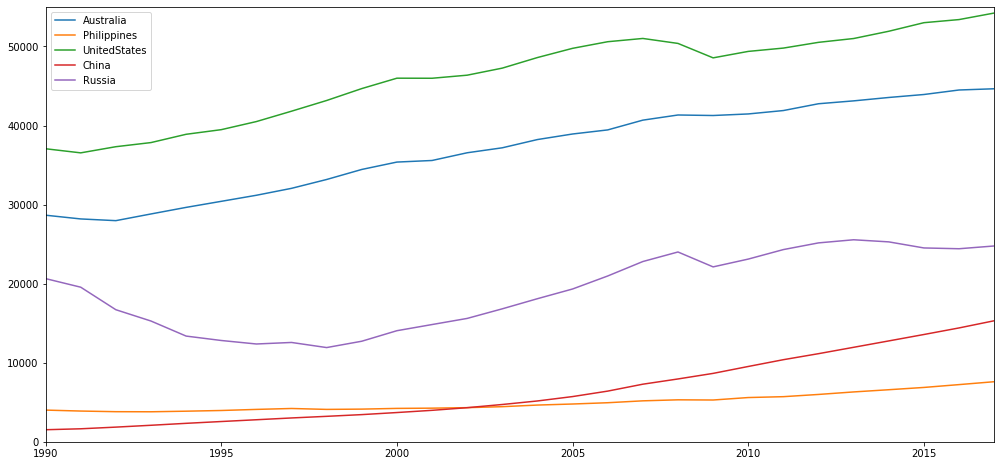

In [1077]:
fig = plt.figure()

for frame in [search_data, search_data2, search_data3, search_data4, search_data5]:
    plt.plot(frame['Year'], frame['GDP'])

plt.xlim(1990,2017)
plt.ylim(0,55000)
plt.legend(['Australia', 'Philippines', 'UnitedStates', 'China', 'Russia'])

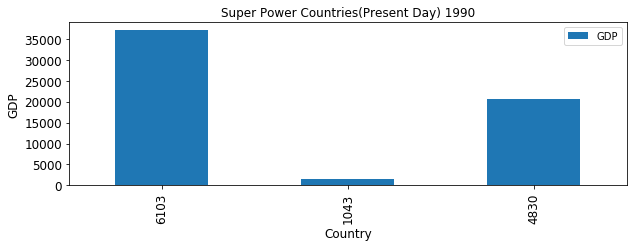

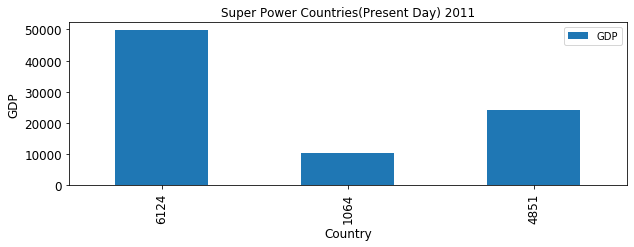

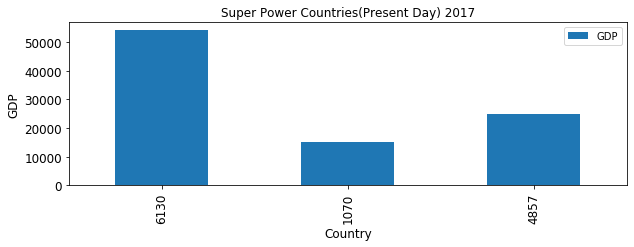

In [1053]:
ax = merged_super_1990[['GDP','Country']].plot(kind='bar', title ="Super Power Countries(Present Day) 1990", figsize=(10, 3), legend=True, fontsize=12)
ax.set_xlabel("Country", fontsize=12)
ax.set_ylabel("GDP", fontsize=12)

ax2 = merged_super_2011[['GDP','Country']].plot(kind='bar', title ="Super Power Countries(Present Day) 2011", figsize=(10, 3), legend=True, fontsize=12)
ax2.set_xlabel("Country", fontsize=12)
ax2.set_ylabel("GDP", fontsize=12)

ax3 = merged_super_2017[['GDP','Country']].plot(kind='bar', title ="Super Power Countries(Present Day) 2017", figsize=(10, 3), legend=True, fontsize=12)
ax3.set_xlabel("Country", fontsize=12)
ax3.set_ylabel("GDP", fontsize=12)

plt.show()

Text(0, 0.5, 'GDP')

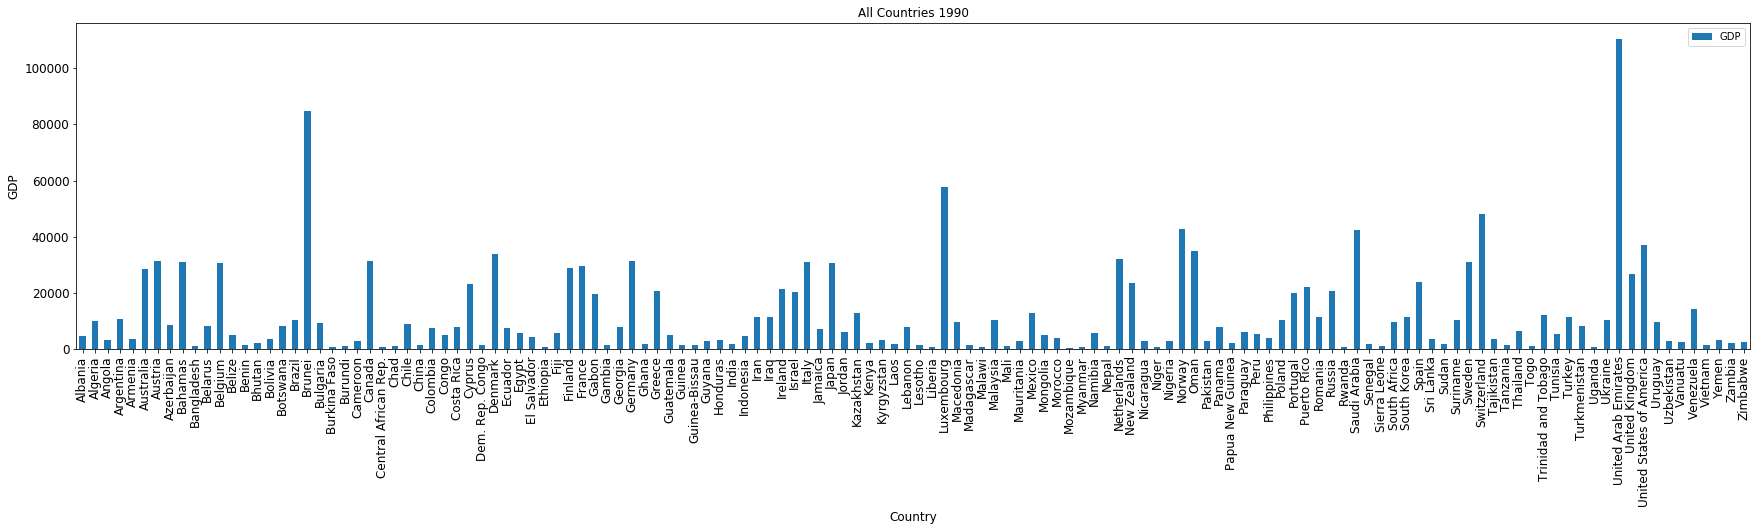

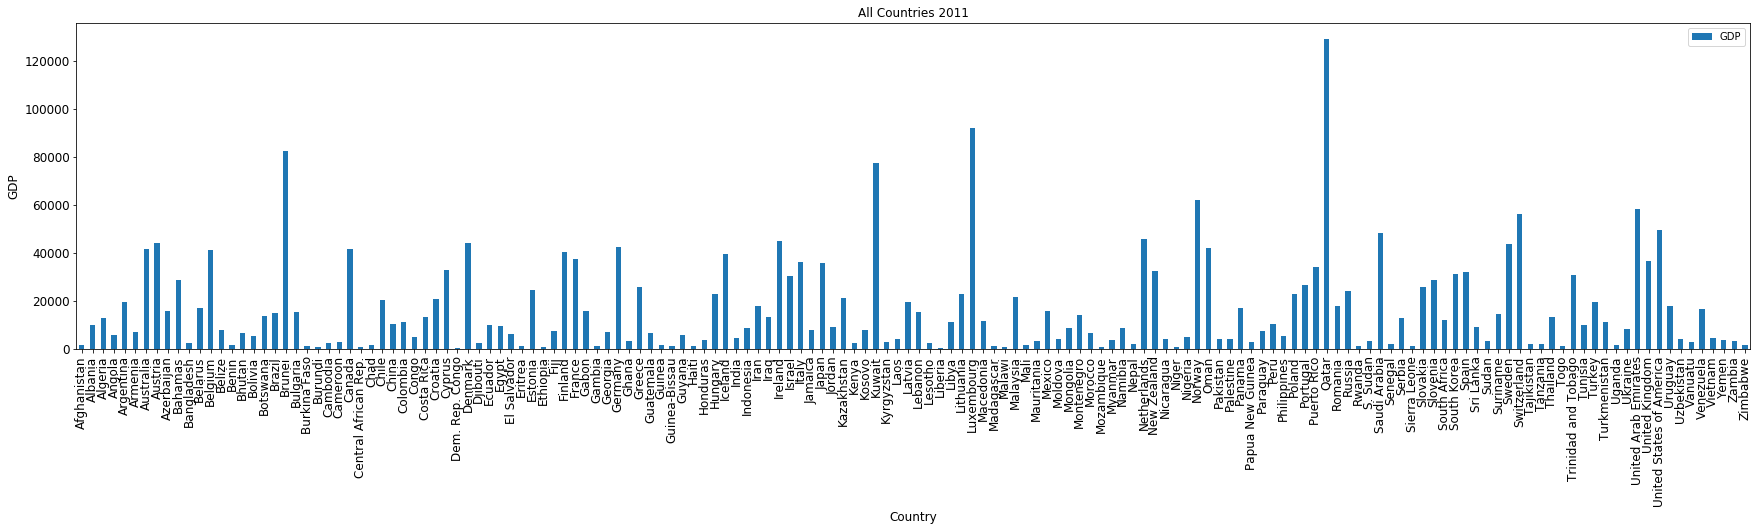

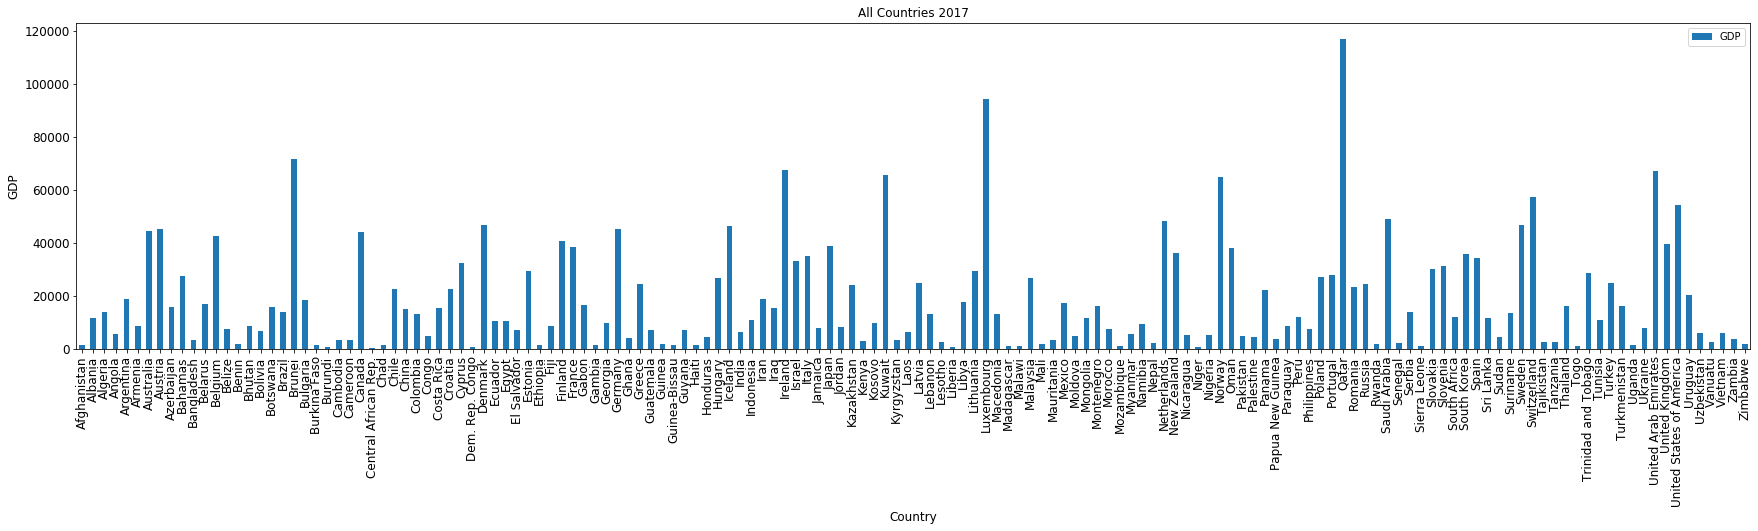

In [1054]:
ax4 = df_1990[['GDP',]].plot(kind='bar', title ="All Countries 1990", figsize=(30, 6), legend=True, fontsize=12)
ax4.set_xlabel("Country", fontsize=12)
ax4.set_ylabel("GDP", fontsize=12)

ax4 = df_2011[['GDP',]].plot(kind='bar', title ="All Countries 2011", figsize=(30, 6), legend=True, fontsize=12)
ax4.set_xlabel("Country", fontsize=12)
ax4.set_ylabel("GDP", fontsize=12)

ax4 = df_2017[['GDP',]].plot(kind='bar', title ="All Countries 2017", figsize=(30, 6), legend=True, fontsize=12)
ax4.set_xlabel("Country", fontsize=12)
ax4.set_ylabel("GDP", fontsize=12)

In [1055]:
fp_data.head()

Country    2020    2019    2018    2017    2016   2015    2014    2013  \
0          NaN -122.00 -121.00 -118.00 -120.00 -120.00   -122 -128.00 -128.00   
1  Afghanistan   37.70   36.55   37.28   39.46   37.75  37.44   37.07   37.36   
2          NaN  -84.00  -82.00  -75.00  -76.00  -82.00    -82  -85.00 -102.00   
3      Albania   30.25   29.84   29.49   29.92   29.92  28.77   29.92   30.88   
4          NaN -146.00 -141.00 -136.00 -134.00 -129.00   -119 -121.00 -125.00   

    2012    2010    2009    2008   2007    2006    2005    2004    2003  2002  
0   -150 -147.00 -149.00 -156.00 -142.0 -130.00 -125.00  -97.00 -134.00  -104  
1     74   51.67   54.25   59.25   56.5   44.25   39.17   28.25   40.17  35.5  
2    -96  -80.00  -88.00  -79.00  -87.0  -80.00  -62.00  -50.00  -34.00   NaN  
3  34.44   21.50   21.75   16.00   25.5   18.00   14.17   11.50    6.50   NaN  
4   -122 -133.00 -141.00 -121.00 -123.0 -126.00 -129.00 -128.00 -108.00   -95

In [1056]:
fp_data = fp_data.drop(fp_data.index[0])
fp_data_fix = fp_data.iloc[::2,:]
fp_data_fix.head()

Country   2020   2019   2018   2017   2016   2015   2014   2013   2012  \
1  Afghanistan  37.70  36.55  37.28  39.46  37.75  37.44  37.07  37.36     74   
3      Albania  30.25  29.84  29.49  29.92  29.92  28.77  29.92  30.88  34.44   
5      Algeria  45.52  45.75  43.13  42.83  41.69  36.63  36.26  36.54     56   
7      Andorra  23.23  24.63  22.21  21.03  19.87  19.87   6.82   6.82    NaN   
9       Angola  33.92  34.96  38.36  40.42  39.89  37.84  36.50  37.80  58.43   

    2010   2009   2008  2007   2006   2005   2004   2003   2002  
1  51.67  54.25  59.25  56.5  44.25  39.17  28.25  40.17   35.5  
3  21.50  21.75  16.00  25.5  18.00  14.17  11.50   6.50    NaN  
5  47.33  49.56  31.33  40.5  40.00  40.33  43.50  33.00     31  
7    NaN    NaN    NaN   NaN    NaN    NaN    NaN    NaN    NaN  
9  28.50  36.50  29.50  26.5  21.50  18.00  26.50  28.00  30.17

In [1057]:
fp_merged = world_condensed.set_index('name').join(fp_data_fix.set_index('Country'))
fp_merged.head()

pop_est      continent  \
name                                                 
Fiji                         920938        Oceania   
Tanzania                   53950935         Africa   
W. Sahara                    603253         Africa   
Canada                     35623680  North America   
United States of America  326625791  North America   

                                                                   geometry  \
name                                                                          
Fiji                      MULTIPOLYGON (((180.00000 -16.06713, 180.00000...   
Tanzania                  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   
W. Sahara                 POLYGON ((-8.66559 27.65643, -8.66512 27.58948...   
Canada                    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...   
United States of America  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...   

                           2020   2019   2018   2017   2016   2015   2014  \
name                                                                        
Fiji                      27.41  27.18  26.55  28.64  29.37  31.28  32.57   
Tanzania                  40.25  36.28  30.65  30.65  28.65  28.09  27.30   
W. Sahara                   NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Canada                    15.29  15.69  15.28  16.53  15.26  10.99  10.99   
United States of America  23.85  25.69  23.73  23.88  22.49  24.41  23.49   

                          ...   2012   2010  2009   2008   2007   2006  2005  \
name                      ...                                                  
Fiji                      ...     55  52.75  60.0  16.00  33.50  14.00  14.0   
Tanzania                  ...      6  13.00  15.5  15.00  18.00  19.82  17.5   
W. Sahara                 ...    NaN    NaN   NaN    NaN    NaN    NaN   NaN   
Canada                    ...  −5.67   7.00   3.7   3.33   4.88   4.50   4.5   
United States of America  ...     14   6.75   4.0   8.00  14.50  13.00   9.5   

                           2004   2003   2002  
name                                           
Fiji                      16.00  11.50    NaN  
Tanzania                  14.50  16.50  21.25  
W. Sahara                   NaN    NaN    NaN  
Canada                     3.33   1.83   0.75  
United States of America   4.00   6.00   4.75  

[5 rows x 21 columns]

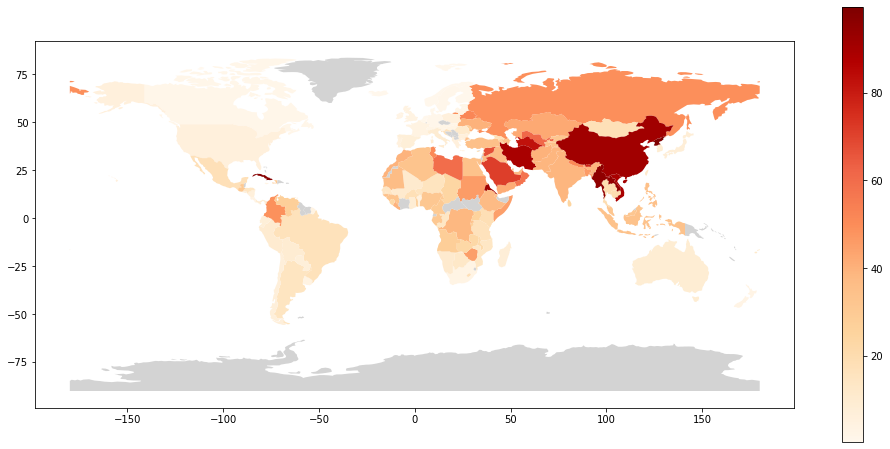

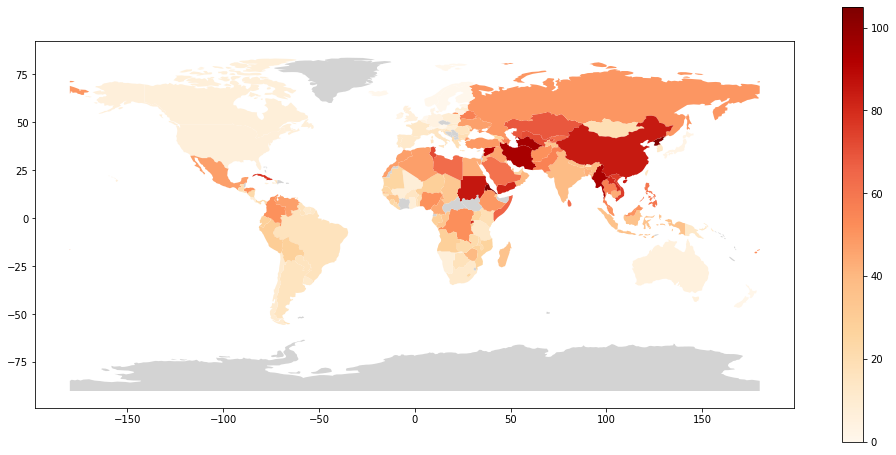

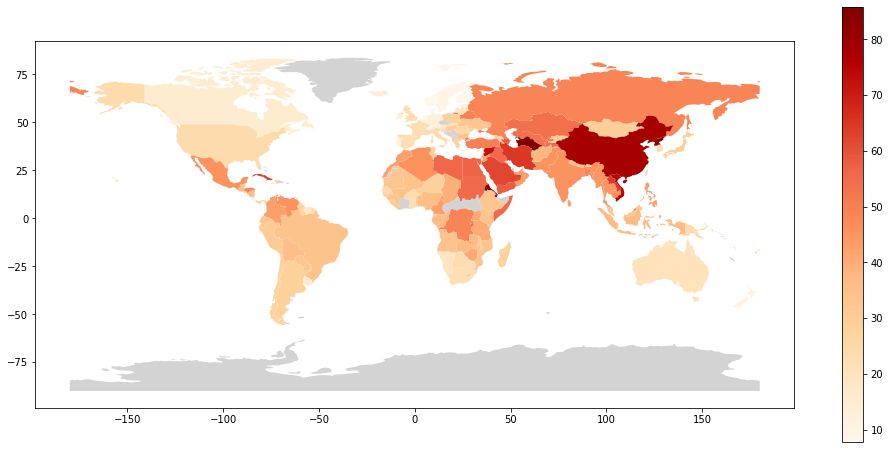

In [1058]:
fp_merged.plot(column='2003', legend=True, cmap='OrRd', missing_kwds={"color": "lightgrey"})
# fp_merged.plot(column='2005', legend=True, cmap='OrRd', missing_kwds={"color": "lightgrey"})
fp_merged.plot(column='2010', legend=True, cmap='OrRd', missing_kwds={"color": "lightgrey"})
fp_merged.plot(column='2020', legend=True, cmap='OrRd', missing_kwds={"color": "lightgrey"})


In [1060]:
fp_data_fix_melt = fp_data_fix.melt(id_vars=["Country"], var_name="Year", value_name="PFI")
fp_data_fix_melt['Year'] = fp_data_fix_melt['Year'].str.extract('(\d+)', expand=False)
# fp_data_fix_melt['PFI'] = fp_data_fix_melt['PFI'].str.extract('(\d+)', expand=False)
fp_data_fix_melt['PFI'] = fp_data_fix_melt['PFI'].astype(str)

fp_data_fix_melt['Year'] = fp_data_fix_melt['Year'].astype(int)
# fp_data_fix_melt['PFI'] = numeric_string['PFI'].astype(float)
# fp_data_fix_melt["PFI"] = pd.to_numeric(fp_data_fix_melt["PFI"], downcast="float")

fp_data_fix_melt.head()

Country  Year    PFI
0  Afghanistan  2020   37.7
1      Albania  2020  30.25
2      Algeria  2020  45.52
3      Andorra  2020  23.23
4       Angola  2020  33.92

In [1063]:
search_data_fp = fp_data_fix[fp_data_fix['Country'].str.match('Afghanistan')]
search_data_fp#.plot()
search_data_fp2 = fp_data_fix[fp_data_fix['Country'].str.match('Australia')]
search_data_fp3 = fp_data_fix[fp_data_fix['Country'].str.match('Philippines')]
search_data_fp4 = fp_data_fix[fp_data_fix['Country'].str.match('United States of America')]
search_data_fp5 = fp_data_fix[fp_data_fix['Country'].str.match('China')]
search_data_fp6 = fp_data_fix[fp_data_fix['Country'].str.match('Russia')]

In [1064]:
search_data_fp_melt = search_data_fp.melt(id_vars=["Country"], var_name="Year", value_name="PFI")
search_data_fp_melt['Year'] = search_data_fp_melt['Year'].astype(int)
search_data_fp_melt['PFI'] = search_data_fp_melt['PFI'].astype(float)

search_data_fp_melt2 = search_data_fp2.melt(id_vars=["Country"], var_name="Year", value_name="PFI")
search_data_fp_melt2['Year'] = search_data_fp_melt2['Year'].astype(int)
search_data_fp_melt2['PFI'] = search_data_fp_melt2['PFI'].astype(float)

search_data_fp_melt3 = search_data_fp3.melt(id_vars=["Country"], var_name="Year", value_name="PFI")
search_data_fp_melt3['Year'] = search_data_fp_melt3['Year'].astype(int)
search_data_fp_melt3['PFI'] = search_data_fp_melt3['PFI'].astype(float)

search_data_fp_melt4 = search_data_fp4.melt(id_vars=["Country"], var_name="Year", value_name="PFI")
search_data_fp_melt4['Year'] = search_data_fp_melt4['Year'].astype(int)
search_data_fp_melt4['PFI'] = search_data_fp_melt4['PFI'].astype(float)

search_data_fp_melt5 = search_data_fp5.melt(id_vars=["Country"], var_name="Year", value_name="PFI")
search_data_fp_melt5['Year'] = search_data_fp_melt5['Year'].astype(int)
search_data_fp_melt5['PFI'] = search_data_fp_melt5['PFI'].astype(float)

search_data_fp_melt6 = search_data_fp6.melt(id_vars=["Country"], var_name="Year", value_name="PFI")
search_data_fp_melt6['Year'] = search_data_fp_melt6['Year'].astype(int)
search_data_fp_melt6['PFI'] = search_data_fp_melt6['PFI'].astype(float)

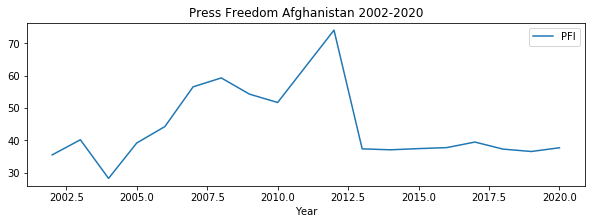

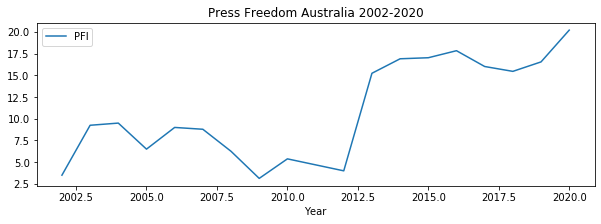

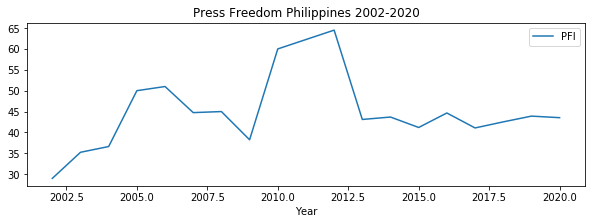

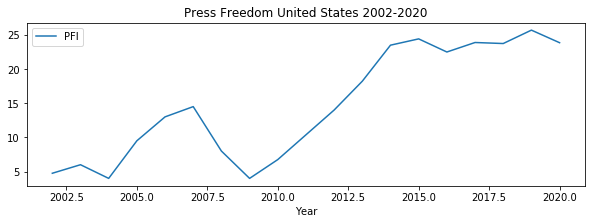

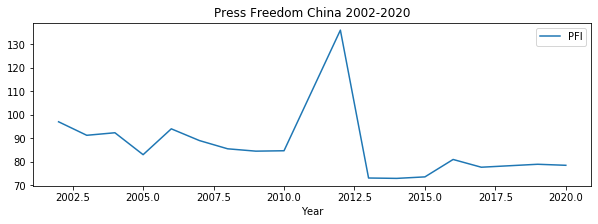

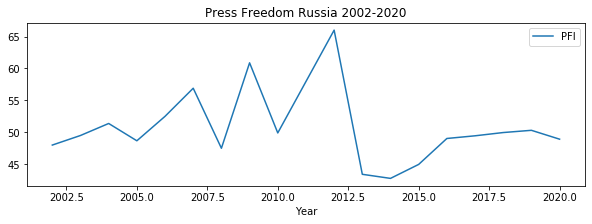

In [1066]:
search_data_fp_melt.plot(x='Year', y='PFI', kind='line', title='Press Freedom Afghanistan 2002-2020', figsize=(10, 3))
search_data_fp_melt2.plot(x='Year', y='PFI', kind='line', title='Press Freedom Australia 2002-2020', figsize=(10, 3))
search_data_fp_melt3.plot(x='Year', y='PFI', kind='line', title='Press Freedom Philippines 2002-2020', figsize=(10, 3))
search_data_fp_melt4.plot(x='Year', y='PFI', kind='line', title='Press Freedom United States 2002-2020', figsize=(10, 3))
search_data_fp_melt5.plot(x='Year', y='PFI', kind='line', title='Press Freedom China 2002-2020', figsize=(10, 3))
search_data_fp_melt6.plot(x='Year', y='PFI', kind='line', title='Press Freedom Russia 2002-2020', figsize=(10, 3))

plt.show()

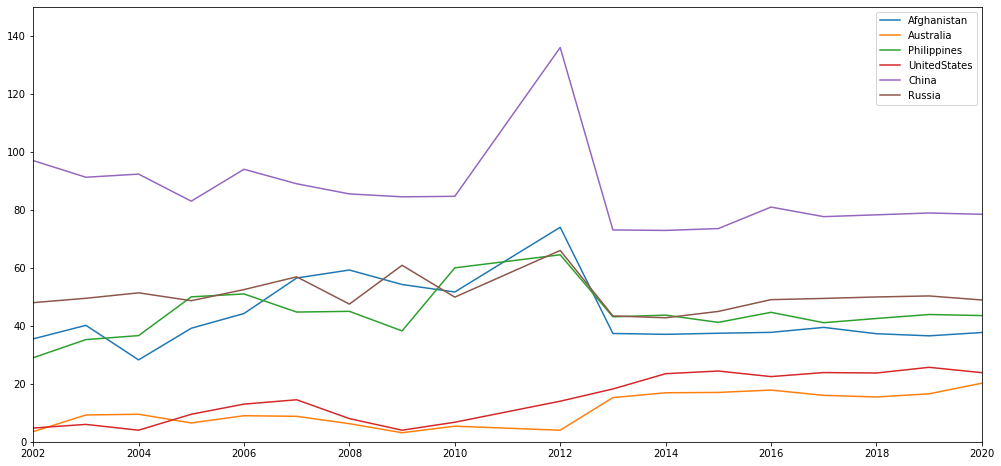

In [1067]:
fig = plt.figure()

for frame in [search_data_fp_melt, search_data_fp_melt2, search_data_fp_melt3, search_data_fp_melt4, search_data_fp_melt5, search_data_fp_melt6]:
    plt.plot(frame['Year'], frame['PFI'])

plt.xlim(2002,2020)
plt.ylim(0,150)
plt.legend(['Afghanistan', 'Australia', 'Philippines', 'UnitedStates', 'China', 'Russia'])